1. Volume of fluid (VOF) --> find_vof: Ratio of fluid region to overall rectangular design space, will range between 0 to 1

In [ ]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import openai
from openai import OpenAI
import os
import io
import re

# === SETUP ===
openai.api_key = "REDACTED"
client = OpenAI(api_key=openai.api_key)
base_prompt = """Write a Python function named `num_outlets()` that counts the number of outlet channels in a numpy array representing a binary or grayscale image.
Inlet channels are always located on the **left** edge of the image, and outlet channels are located on the **right** edge of the image.
Return the number of **outlet** channels as an integer. Do not count inlets. The input is a numpy array."""


# === Extract Python code from GPT output ===
def extract_python_code(response_text):
    matches = re.findall(r"```(?:python)?(.*?)```", response_text, re.DOTALL)
    return matches[0].strip() if matches else response_text.strip()

# === Prompt GPT to generate num_outlets() ===
def get_outlet_function_from_gpt(prompt):
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    )
    return response.choices[0].message.content

# === Upload image ===
def upload_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename

# === Run generated function on image ===
def run_generated_outlet_function(code_str, image_array):
    code_str = extract_python_code(code_str)
    local_vars = {}
    exec(code_str, globals(), local_vars)
    num_outlets_func = local_vars.get("num_outlets")
    if num_outlets_func is None:
        raise ValueError("Function `num_outlets()` not found.")
    return num_outlets_func(image_array)

# === MAIN LOOP ===
attempts = 0
mae_list = []
all_errors = []

while attempts < 10:
    print(f"\n📤 Upload a PNG image for attempt {attempts + 1}")
    image_path = upload_image()

    image = Image.open(image_path).convert('L')
    image_array = np.array(image)

    actual_count = num_outlets_actual(image_path)

    if attempts == 0:
        prompt = base_prompt
    else:
        feedback = f"\n\nFeedback: Your previous estimate had MAE = {mae_list[-1]:.4f}. Please improve the accuracy of your num_outlets() function."
        prompt = base_prompt + feedback

    print("🔁 Calling ChatGPT for num_outlets() function...")
    code = get_outlet_function_from_gpt(prompt)
    print("🧠 Function received from GPT:\n", code)

    try:
        pred_count = run_generated_outlet_function(code, image_array)
    except Exception as e:
        print("❌ Error running the generated function:", e)
        mae_list.append(10)  # Penalize failure
        attempts += 1
        continue

    error = abs(pred_count - actual_count)
    all_errors.append(error)
    mae = error if attempts == 0 else np.mean(all_errors)
    mae_list.append(mae)

    print(f"\n✅ Attempt {attempts + 1}:")
    print(f"Predicted Outlet Count: {pred_count}")
    print(f"Actual Outlet Count:    {actual_count}")
    print(f"Absolute Error:         {error}")
    print(f"MAE:                    {mae:.4f}")

    if mae < 0.1:
        print("\n🎯 Success: MAE is acceptable. Returning the final num_outlets() function:\n")
        print(extract_python_code(code))
        break
    else:
        print("\n⚠️ Not accurate enough. Please upload another image to help improve the model.\n")

    attempts += 1

# === PLOT MAE ===
plt.plot(range(1, len(mae_list)+1), mae_list, marker='o')
plt.title("Mean Absolute Error (MAE) for num_outlets() over Attempts")
plt.xlabel("Attempt")
plt.ylabel("MAE")
plt.grid(True)
plt.show()



📤 Upload a PNG image for attempt 1


Saving design_80.png to design_80 (2).png
🔁 Calling ChatGPT for num_outlets() function...
🧠 Function received from GPT:
 To solve this problem, we need to analyze the right edge of the given numpy array, which represents an image. The task is to count the number of distinct outlet channels on this edge. An outlet channel can be defined as a contiguous sequence of non-zero pixels (for binary images) or pixels above a certain threshold (for grayscale images) on the right edge of the image.

Here's a step-by-step approach to implement the `num_outlets()` function:

1. **Extract the Right Edge**: Get the last column of the numpy array, which represents the right edge of the image.

2. **Identify Outlets**: Traverse through this column to identify contiguous sequences of non-zero pixels. Each contiguous sequence represents an outlet channel.

3. **Count the Outlets**: Keep a count of these sequences.

Here's the implementation of the `num_outlets()` function:

```python
import numpy as np



Saving design_24.png to design_24.png
🔁 Calling ChatGPT for num_outlets() function...
🧠 Function received from GPT:
 To improve the accuracy of the `num_outlets()` function, we need to ensure that we correctly identify and count the outlet channels on the right edge of the image. Here's a refined version of the function:

```python
import numpy as np

def num_outlets(image):
    """
    Counts the number of outlet channels on the right edge of a binary or grayscale image.

    Parameters:
    image (numpy.ndarray): A 2D numpy array representing a binary or grayscale image.

    Returns:
    int: The number of outlet channels on the right edge of the image.
    """
    # Ensure the input is a 2D numpy array
    if not isinstance(image, np.ndarray) or image.ndim != 2:
        raise ValueError("Input must be a 2D numpy array.")

    # Get the right edge of the image
    right_edge = image[:, -1]

    # Identify unique segments on the right edge
    # We assume that a channel is represente

Saving design_19.png to design_19.png
🔁 Calling ChatGPT for num_outlets() function...
🧠 Function received from GPT:
 To improve the accuracy of the `num_outlets()` function, we need to ensure that we correctly identify and count the outlet channels on the right edge of the image. Here's a refined approach to achieve this:

1. **Identify Outlets**: We will scan the rightmost column of the image to identify continuous segments of non-zero values, which represent outlet channels.

2. **Count Outlets**: We will count these continuous segments to determine the number of outlet channels.

Here's the implementation of the `num_outlets()` function:

```python
import numpy as np

def num_outlets(image):
    # Ensure the input is a numpy array
    if not isinstance(image, np.ndarray):
        raise ValueError("Input must be a numpy array.")
    
    # Get the rightmost column of the image
    right_edge = image[:, -1]
    
    # Initialize variables to count outlets
    outlet_count = 0
    in_o

Saving design_195.png to design_195.png
🔁 Calling ChatGPT for num_outlets() function...
🧠 Function received from GPT:
 To improve the accuracy of the `num_outlets()` function, we need to ensure that we correctly identify and count the outlet channels on the right edge of the image. An outlet channel is defined as a continuous segment of non-zero pixels on the right edge of the image. Here's how you can implement this function:

```python
import numpy as np

def num_outlets(image):
    """
    Counts the number of outlet channels on the right edge of a binary or grayscale image.

    Parameters:
    image (numpy.ndarray): A 2D numpy array representing a binary or grayscale image.

    Returns:
    int: The number of outlet channels on the right edge of the image.
    """
    # Get the right edge of the image
    right_edge = image[:, -1]
    
    # Initialize the count of outlet channels
    outlet_count = 0
    
    # Flag to track if we are in an outlet channel
    in_outlet = False
 

KeyboardInterrupt: 

# VOF ground truth function
## (hidden from chatGPT)


📤 Upload a PNG image for attempt 1


Saving design_80.png to design_80 (8).png
🔁 Calling ChatGPT for outlet_thicknesses() function...
🧠 Function received from GPT:
 To calculate the average thickness of outlet channels in a binary or grayscale image, we can follow these steps:

1. Identify the outlet channels touching the rightmost edge of the image.
2. Measure the vertical span of each outlet channel.
3. Normalize the thickness by dividing by the total height of the image.
4. Calculate the average thickness of all outlet channels.

Here's a Python function that implements this logic using the `numpy` library:

```python
import numpy as np
from scipy.ndimage import label

def outlet_thicknesses(image):
    """
    Calculate the average thickness of outlet channels in a binary or grayscale image.

    Parameters:
    - image: numpy array representing the binary or grayscale image.

    Returns:
    - Average outlet thickness as a float between 0 and 1.
    """
    # Ensure the image is a binary image
    if image.dtype != 

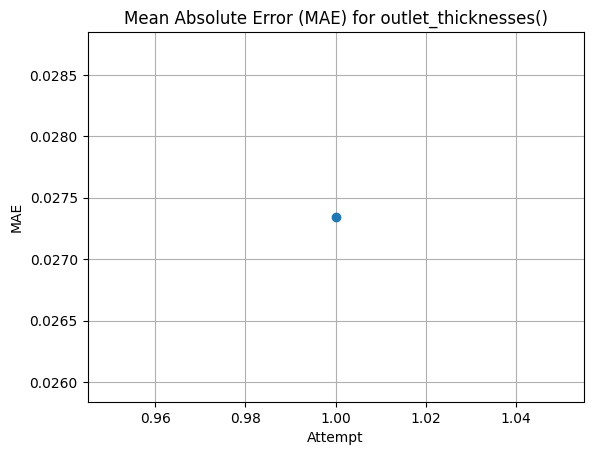

In [ ]:
def find_vof_actual(image_path):
  image = Image.open(image_path)
  grayscale_image = image.convert('L')
  array = np.array(grayscale_image) < 128
  vof = np.sum(array) / array.size
  return vof